# Analisando os dados da Olist

Esta análise se propõe a explorar e tratar os dados fornecidos pela Olist, utilizando três conjuntos de dados essenciais: o __"olist_geolocation_dataset"__ que contém informações sobre a localização geográfica dos consumidores, o __"olist_orders_dataset"__, que registra detalhes de pedidos e transações, e __"olist_products_dataset"__ que nos fornece informações sobre os produtos. 

Base de dados no Kaggle: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce


# Coleta dos Dados

Dados CSV que iremos utilizar:

*  pedidos (olist_orders_dataset)
*  itens dos pedidos (olist_order_items_dataset)
*  detalhes dos produtos (olist_products_dataset)
*  detalhes do consumidor que fez os pedidos (olist_customers_dataset)

In [285]:
import pandas as pd

In [286]:
df_pedidos = pd.read_csv('olist_orders_dataset.csv')
df_pedidos

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


Para a tabela de pedidos, iremos utilizar as seguintes colunas:

- **order_id**: Identificador do pedido
- **customer_id**: Identificador do cliente. Essa coluna é importante pois será a nossa chave com a tabela de consumidor
- **order_status**: Status do pedido
- **order_purchase_timestamp**: timestamp do horário que a compra foi feita
- **order_delivered_customer_date**: timestamp do horário que a compra foi entregue ao cliente

In [287]:
df_itens_pedido = pd.read_csv('olist_order_items_dataset.csv')
df_itens_pedido

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


Para a tabela de itens dos pedidos, iremos utilizar as seguintes colunas:

- **order_id**: Identificador do pedido. Será a nossa chave com a tabela de pedidos
- **product_id**: Identificador do produto
- **seller_id**: Identificador do vendedor
- **shipping_limit_date**: timestamp limite para a entrega do pedido
- **price**: valor do pedido
- **freight_value**: valor do frete

In [288]:
df_produtos = pd.read_csv('olist_products_dataset.csv')
df_produtos

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


Para a tabela de categoria dos produtos, iremos utilizar as seguintes colunas:

- **product_id:** Identificação do Produto
- **product_category_name:** Nome da Categoria do Produto


In [289]:
df_consumidor = pd.read_csv('olist_customers_dataset.csv')
df_consumidor

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


Para a tabela de consumidor, iremos utilizar as seguintes colunas:

- **customer_id**: Identificador do cliente. Essa coluna é importante pois será a nossa chave com a tabela de pedidos. 
- **customer_state**: Estado
- **customer_city**: Cidade

# Objetivo da nossa Análise Exploratória:

Por meio da exploração desses conjuntos de dados, poderemos responder a perguntas importantes, como:

- Qual é o status médio dos pedidos para cada vendedor? Podemos agrupar os dados pela coluna "seller_id" na tabela de itens dos pedidos e calcular a média dos status dos pedidos.
-  Qual é a categoria de produto mais popular em cada cidade? Podemos agrupar os dados pela coluna "customer_city" na tabela de consumidores e contar as ocorrências de categorias de produtos.
- Qual é o valor médio do frete em cada estado dos clientes? Podemos agrupar os dados pela coluna "customer_state" na tabela de consumidores e calcular a média do valor do frete da tabela de itens dos pedidos.
- Quais são os vendedores que mais vendem produtos em uma categoria específica? Podemos agrupar os dados pela coluna "product_category_name" na tabela de categoria dos produtos e encontrar os vendedores mais ativos.

# Limpando os dados da Olist

## Pedidos

In [290]:
# Leitura dos Dados
df_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [291]:
# Filtro das colunas que irei utilizar
columns_drop = ['order_approved_at', 'order_delivered_carrier_date', 'order_estimated_delivery_date']
df_pedidos = df_pedidos.drop(columns_drop, axis=1)
df_pedidos

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54


In [292]:
# Filtro dos pedidos que foram finalizados, mas antes é importante entender todos os status disponíveis que temos na base
df_pedidos['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [293]:
# Filtro apenas dos pedidos que foram entregues
df_pedidos = df_pedidos.loc[df_pedidos['order_status'] == 'delivered']
df_pedidos

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54


In [294]:
# Filtrando somente pedidos finalizados, percebemos que perdemos um número razoável de linhas, cerca de 3 mil.
# Agora, com nosso dataset filtrado, precisamos resetar o seu index:
df_pedidos = df_pedidos.reset_index(drop=True)
df_pedidos

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02
...,...,...,...,...,...
96473,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01
96474,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56
96475,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17
96476,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54


In [295]:
# Para fecharmos a limpeza dessa tabela, precisamos criar uma coluna de mês! Uma das perguntas que precisamos responder é se existe sazonalidade
# nas vendas, então, criar uma coluna de mês irá facilitar bastante nosso trabalho na etapa de análise:

# Vamos transformar nossas colunas de data (que estão como string) em data: 
df_pedidos['order_purchase_timestamp'] = pd.to_datetime(df_pedidos['order_purchase_timestamp'])
df_pedidos['order_delivered_customer_date'] = pd.to_datetime(df_pedidos['order_delivered_customer_date'])

# Agora sim, vamos criar uma coluna de mês!
df_pedidos['reference_month'] = df_pedidos['order_purchase_timestamp'].dt.strftime('%Y-%m-01')
df_pedidos

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,reference_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-01
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-07-01
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-08-01
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-11-01
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-01
...,...,...,...,...,...,...
96473,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03-01
96474,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-02-01
96475,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-08-01
96476,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-01-01


## Itens do Pedido


In [296]:
# Vamos entender um pouquinho melhor dos nossos dados
df_itens_pedido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


## Detalhe dos Produtos

In [297]:
# Leitura dos dados
df_produtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [298]:
# Selecionando apenas as colunas necessárias
colunas_necessarias = ['product_id', 'product_category_name']

# Crie um novo DataFrame com as colunas selecionadas
df_produtos = df_produtos[colunas_necessarias]
df_produtos





,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas
...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios


## Detalhe Consumidor

In [299]:
# Leitura dos dados
df_consumidor.info()
df_consumidor

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [300]:
# Selecionando apenas as colunas necessárias
colunas_consumidor = ['customer_id', 'customer_city', 'customer_state']

# Crie um novo DataFrame com as colunas selecionadas
df_consumidor = df_consumidor[colunas_consumidor]
df_consumidor

,customer_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP
...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,canoas,RS


## Juntando os três datasets

In [301]:
# Por padrão é realizado o merge dos dados com o inner join
# Jutando os df pedidos e produtos através do order_id
df_olist = pd.merge(df_pedidos, df_itens_pedido, on='order_id')
df_olist

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,reference_month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-01,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-07-01,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-08-01,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-11-01,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-01,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...
110192,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-02-01,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
110193,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-08-01,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
110194,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-01-01,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
110195,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-01-01,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [302]:
# Juntando agora com os dados de consumidor através do product_id
df_olist = pd.merge(df_olist, df_produtos, on='product_id')

In [303]:
df_olist

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,reference_month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-01,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-18 14:44:43,2017-08-01,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-07 18:30:01,2017-08-01,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-11-07 18:04:59,2017-10-01,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,utilidades_domesticas
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-07-01,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110192,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-23 15:36:29,2017-08-01,1,0df37da38a30a713453b03053d60d3f7,218d46b86c1881d022bce9c68a7d4b15,2017-08-17 21:35:26,356.00,18.12,esporte_lazer
110193,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-23 15:36:29,2017-08-01,2,0df37da38a30a713453b03053d60d3f7,218d46b86c1881d022bce9c68a7d4b15,2017-08-17 21:35:26,356.00,18.12,esporte_lazer
110194,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2018-01-26 15:45:14,2017-12-01,1,3d2c44374ee42b3003a470f3e937a2ea,ce248b21cb2adc36282ede306b7660e5,2017-12-27 10:09:52,55.90,15.14,instrumentos_musicais
110195,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03-01,1,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb25705606fe3dfe7,2017-03-15 09:54:05,72.00,13.08,beleza_saude


In [304]:
# Juntando agora com os dados do consumidor através do customer_id
df_olist = pd.merge(df_olist, df_consumidor, on='customer_id')
df_olist

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,reference_month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-01,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,sao paulo,SP
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-18 14:44:43,2017-08-01,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,sao paulo,SP
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-07 18:30:01,2017-08-01,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,sao paulo,SP
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-11-07 18:04:59,2017-10-01,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,utilidades_domesticas,florianopolis,SC
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-07-01,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,barreiras,BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110192,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-23 15:36:29,2017-08-01,1,0df37da38a30a713453b03053d60d3f7,218d46b86c1881d022bce9c68a7d4b15,2017-08-17 21:35:26,356.00,18.12,esporte_lazer,sao paulo,SP
110193,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-23 15:36:29,2017-08-01,2,0df37da38a30a713453b03053d60d3f7,218d46b86c1881d022bce9c68a7d4b15,2017-08-17 21:35:26,356.00,18.12,esporte_lazer,sao paulo,SP
110194,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2018-01-26 15:45:14,2017-12-01,1,3d2c44374ee42b3003a470f3e937a2ea,ce248b21cb2adc36282ede306b7660e5,2017-12-27 10:09:52,55.90,15.14,instrumentos_musicais,campo do tenente,PR
110195,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03-01,1,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb25705606fe3dfe7,2017-03-15 09:54:05,72.00,13.08,beleza_saude,sao jose dos campos,SP


In [305]:
# Exportando a base final 
df_olist.to_csv('base_final_olist.csv', index=False)

# Analisando os dados

Agora chegou a hora de respondermos as perguntas que estipulamos no começo dessa análise:
- Qual é o status médio dos pedidos para cada vendedor?
-  Qual é a categoria de produto mais popular em cada cidade? 
- Qual é o valor médio do frete em cada estado dos clientes?
- Quais são os vendedores que mais vendem produtos em uma categoria específica? Podemos agrupar os dados pela coluna "product_category_name" na tabela de categoria dos produtos e encontrar os vendedores mais ativos.

In [306]:
# Carregue a tabela a partir do novo arquivo CSV
data_olist = pd.read_csv("base_final_olist.csv")

In [307]:
# Remova linhas vazias ou nulas da coluna 'product_category_name'
data = data.dropna(subset=['product_category_name'])
data_olist

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,reference_month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-01,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,sao paulo,SP
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-18 14:44:43,2017-08-01,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,sao paulo,SP
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-07 18:30:01,2017-08-01,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,sao paulo,SP
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-11-07 18:04:59,2017-10-01,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,utilidades_domesticas,florianopolis,SC
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-07-01,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,barreiras,BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110192,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-23 15:36:29,2017-08-01,1,0df37da38a30a713453b03053d60d3f7,218d46b86c1881d022bce9c68a7d4b15,2017-08-17 21:35:26,356.00,18.12,esporte_lazer,sao paulo,SP
110193,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-23 15:36:29,2017-08-01,2,0df37da38a30a713453b03053d60d3f7,218d46b86c1881d022bce9c68a7d4b15,2017-08-17 21:35:26,356.00,18.12,esporte_lazer,sao paulo,SP
110194,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2018-01-26 15:45:14,2017-12-01,1,3d2c44374ee42b3003a470f3e937a2ea,ce248b21cb2adc36282ede306b7660e5,2017-12-27 10:09:52,55.90,15.14,instrumentos_musicais,campo do tenente,PR
110195,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03-01,1,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb25705606fe3dfe7,2017-03-15 09:54:05,72.00,13.08,beleza_saude,sao jose dos campos,SP


In [308]:
# Leitura dos Dados
df_olist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110197 entries, 0 to 110196
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110197 non-null  object        
 1   customer_id                    110197 non-null  object        
 2   order_status                   110197 non-null  object        
 3   order_purchase_timestamp       110197 non-null  datetime64[ns]
 4   order_delivered_customer_date  110189 non-null  datetime64[ns]
 5   reference_month                110197 non-null  object        
 6   order_item_id                  110197 non-null  int64         
 7   product_id                     110197 non-null  object        
 8   seller_id                      110197 non-null  object        
 9   shipping_limit_date            110197 non-null  object        
 10  price                          110197 non-null  float64       
 11  

###  1. Quais são as categorias de produtos mais caras?

 Podemos agrupar os dados para o código que selecionando as colunas relevantes ("product_category_name" e "price") e, em seguida, ordena os dados pelo preço em ordem decrescente.

In [309]:
# Escolha as colunas relevantes, como "product_category_name" e "price"
colunas_relevantes = ["product_category_name", "price"]
data_filtrado = data[colunas_relevantes]

# Ordene os dados pelo preço em ordem decrescente
data_ordenado = data_filtrado.sort_values(by="price", ascending=False)
data_ordenado



,product_category_name,price
77946,utilidades_domesticas,6735.00
83412,pcs,6729.00
39227,artes,6499.00
97178,eletroportateis,4799.00
91035,eletroportateis,4690.00
...,...,...
107917,beleza_saude,1.20
107918,beleza_saude,1.20
96879,construcao_ferramentas_construcao,0.85
96878,construcao_ferramentas_construcao,0.85


### 2. Qual é a categoria de produto mais popular em cada estado? 

Podemos agrupar os dados pela coluna "customer_state" na tabela de consumidores e contar as ocorrências de categorias de produtos.

In [311]:
# Agrupe os dados pela coluna "customer_city_x" (cidade do cliente) e obtenha a categoria de produto mais popular
categoria_estado = data.groupby('customer_state')['product_category_name'].agg(lambda x: x.mode().iat[0] if not x.empty else None).reset_index()

# Renomeie as colunas
categoria_estado.columns = ['Estado', 'Categoria de Produto Mais Popular']
categoria_estado

,Estado,Categoria de Produto Mais Popular
0,AC,moveis_decoracao
1,AL,beleza_saude
2,AM,beleza_saude
3,AP,beleza_saude
4,BA,beleza_saude
5,CE,beleza_saude
6,DF,beleza_saude
7,ES,cama_mesa_banho
8,GO,cama_mesa_banho
9,MA,beleza_saude


### 3.Qual é o valor médio do frete em cada estado dos clientes?


 Podemos agrupar os dados pela coluna "customer_state" na tabela de consumidores e calcular a média do valor do frete da tabela de itens dos pedidos.

In [312]:
# Agrupando os dados pela coluna "customer_state_x" (estado do cliente) e calculando a média do valor do frete
media_frete = data_olist.groupby('customer_state')['freight_value'].mean()

# Crie um DataFrame com os resultados
media_frete = pd.DataFrame({'Estado do Cliente': media_frete.index, 'Média do Frete': media_frete.values})
media_frete

,Estado do Cliente,Média do Frete
0,AC,40.047912
1,AL,35.870656
2,AM,33.310613
3,AP,34.160494
4,BA,26.487556
5,CE,32.734495
6,DF,21.072161
7,ES,22.028980
8,GO,22.562868
9,MA,38.492712


### 4. Qual a categoria de produto mais vendida pelos vendedores?



Podemos agrupar os dados pela coluna "seller_id" (identificador do vendedor) e "product_category_name" (nome da categoria do produto) e calcular número de vendas (ou a quantidade de produtos vendidos) em cada combinação de vendedor e categoria de produto.


In [313]:
# Agrupando os dados pela coluna "seller_id" e "product_category_name" e contando o número de vendas
vendas_por_categoria = data.groupby(['seller_id', 'product_category_name']).size().reset_index(name='vendas')

# Buscando a categoria de produto mais vendida para cada vendedor
categoria_mais_vendida = vendas_por_categoria.loc[vendas_por_categoria.groupby('seller_id')['vendas'].idxmax()]

# Ordene o DataFrame do maior para o menor com base na contagem de vendas
categoria_mais_vendida = categoria_mais_vendida.sort_values(by='vendas', ascending=False)
categoria_mais_vendida

,seller_id,product_category_name,vendas
764,1f50f920176fa81dab994f9023523100,ferramentas_jardim,1877
2461,6560211a19b47992c3666cc44a7e94c0,relogios_presentes,1595
1772,4a3ca9315b744ce9f8e9374361493884,cama_mesa_banho,1540
382,1025f0e2d44d7041d6cf58b6550e0bfa,moveis_decoracao,1284
5206,da8622b14eb17ae2831f4ac5b9dab84a,cama_mesa_banho,1274
...,...,...,...
5167,d93b8458c6fe139d85cfa5eadbf55bd2,esporte_lazer,1
1196,31eec405c9bb71dec8e2629a92e764fa,alimentos,1
1195,31e60bf8d103ce47932a85f5562deb16,malas_acessorios,1
2387,6179a28a13a726c29b3bf54c070dccab,malas_acessorios,1


# Visualizações dos dados da Olist



In [314]:
# Importando os pacotes
import seaborn as sns
import matplotlib.pyplot as plt

### Gráfico 1 : Status Médio dos Pedidos

C:\Users\Djleo\AppData\Local\Temp\ipykernel_19232\2926249787.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="price", y="product_category_name", data=top_10_produtos_caros, orient="h", palette=palette)
C:\Users\Djleo\AppData\Local\Temp\ipykernel_19232\2926249787.py:8: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  sns.barplot(x="price", y="product_category_name", data=top_10_produtos_caros, orient="h", palette=palette)


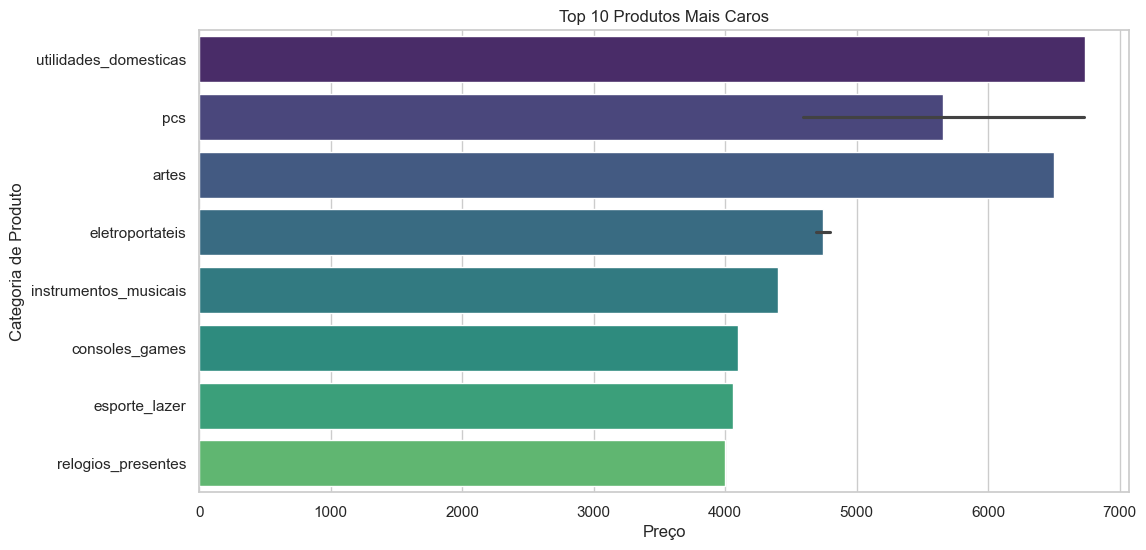

In [315]:
# Selecionando os top 10 produtos mais caros
top_10_produtos_caros = data_ordenado.head(10)

# Gráfico de barras no Seaborn com paleta de cores
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
palette = sns.color_palette("viridis", n_colors=len(top_10_produtos_caros))
sns.barplot(x="price", y="product_category_name", data=top_10_produtos_caros, orient="h", palette=palette)
plt.title("Top 10 Produtos Mais Caros")
plt.xlabel("Preço")
plt.ylabel("Categoria de Produto")
plt.show()

### Gráfico 2 : Categoria de Produto Mais Popular

C:\Users\Djleo\AppData\Local\Temp\ipykernel_19232\3906201346.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Categoria de Produto Mais Popular", y="Estado", data=categoria_estado, palette="viridis")


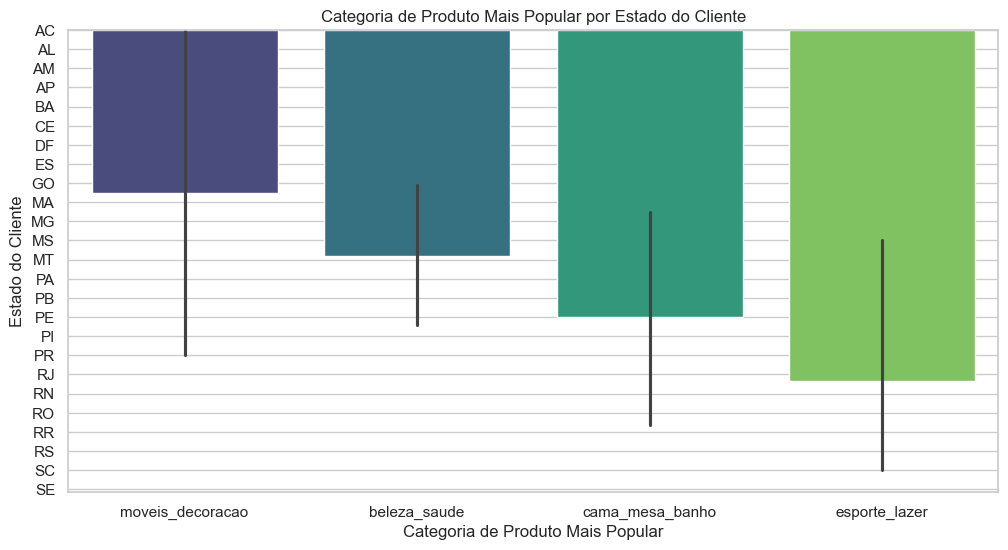

In [316]:
# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x="Categoria de Produto Mais Popular", y="Estado", data=categoria_estado, palette="viridis")
plt.title("Categoria de Produto Mais Popular por Estado do Cliente")
plt.xlabel("Categoria de Produto Mais Popular")
plt.ylabel("Estado do Cliente")
plt.show()

### Gráfico 3 : Média Frete por Estado

C:\Users\Djleo\AppData\Local\Temp\ipykernel_19232\1073921685.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Estado do Cliente", y="Média do Frete", data=media_frete, palette="viridis")


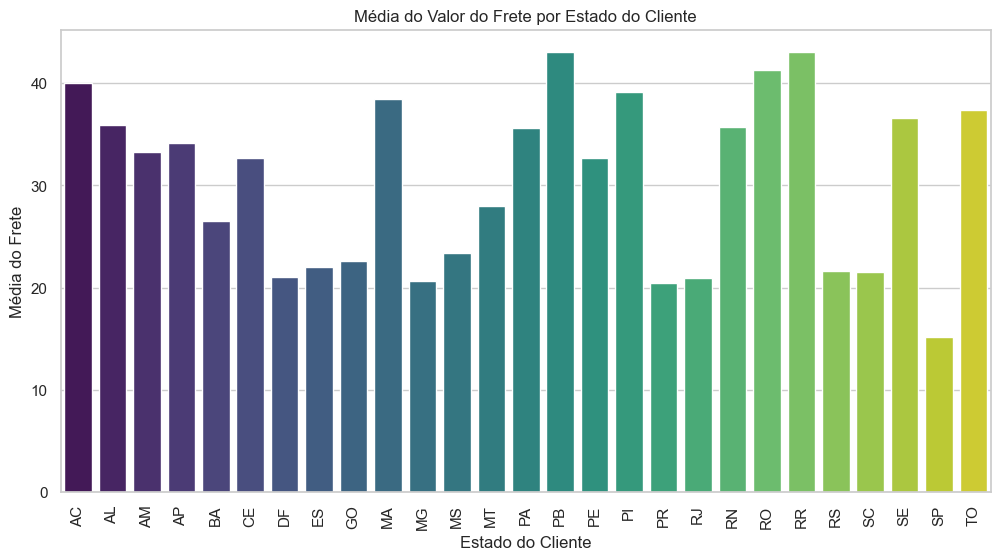

In [317]:
# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x="Estado do Cliente", y="Média do Frete", data=media_frete, palette="viridis")
plt.title("Média do Valor do Frete por Estado do Cliente")
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo x para facilitar a leitura
plt.xlabel("Estado do Cliente")
plt.ylabel("Média do Frete")
plt.show()

### Gráfico 4 : Top 5 Categoria mais Vendida

C:\Users\Djleo\AppData\Local\Temp\ipykernel_19232\1355099079.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="vendas", y="product_category_name", data=top_5_produtos, palette="viridis")


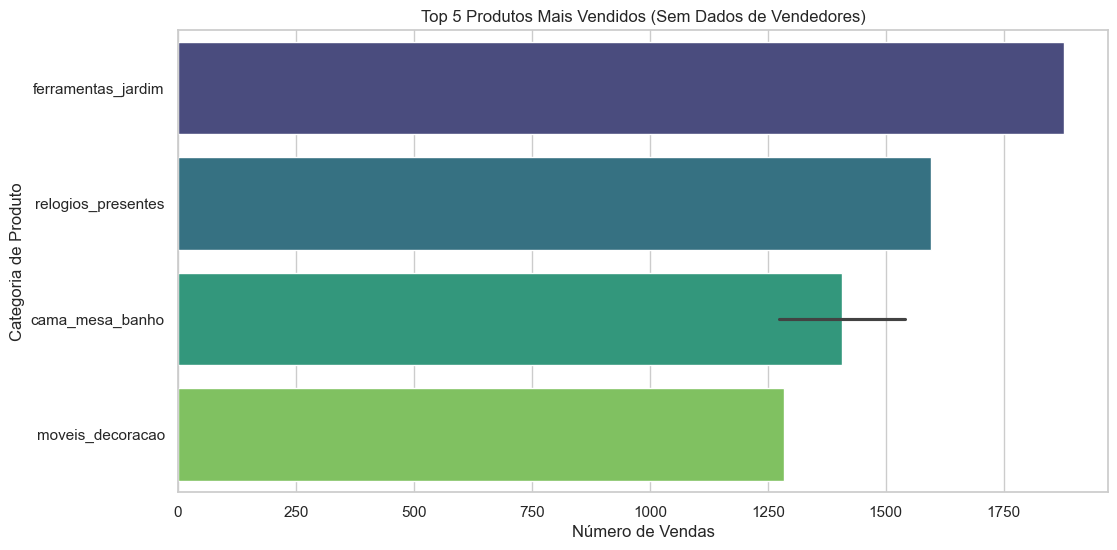

In [318]:
# Selecionando os top 5 produtos mais vendidos
top_5_produtos = categoria_mais_vendida.head(5)


# Gráfico de barras horizontais
plt.figure(figsize=(12, 6))
sns.barplot(x="vendas", y="product_category_name", data=top_5_produtos, palette="viridis")
plt.title("Top 5 Produtos Mais Vendidos (Sem Dados de Vendedores)")
plt.xlabel("Número de Vendas")
plt.ylabel("Categoria de Produto")
plt.show()

__Fim da Análise__